# Limpieza y Análisis de URLs Legítimas - Sector Telecomunicaciones

Este notebook contiene el análisis exploratorio y la limpieza inicial del dataset consolidado de URLs legítimas del sector telecomunicaciones.

## Objetivos

- Evaluar la calidad y cantidad de los datos crudos.  
- Identificar valores nulos, duplicados y otras inconsistencias en las columnas principales.  
- Filtrar filas sin URLs válidas para obtener un dataset limpio y útil para modelado.  
- Documentar cada paso para facilitar la comprensión y reproducibilidad.


In [1]:
import pandas as pd
import os

# Parámetros
base_path = '/Users/test/Desktop/phishing-detector/data/raw/legitimas'
archivo = 'teleco_legitimas_crudo.csv'
ruta_archivo = os.path.join(base_path, archivo)

# Cargar CSV
df_teleco = pd.read_csv(ruta_archivo)

print(f"Dataset cargado para el sector Telecomunicaciones con {len(df_teleco)} filas.")
print(f"Columnas disponibles: {df_teleco.columns.tolist()}")


Dataset cargado para el sector Telecomunicaciones con 430 filas.
Columnas disponibles: ['empresa', 'url', 'fecha', 'estado']


In [2]:
print("Información general del DataFrame:")
print(df_teleco.info())

print("\nValores nulos por columna:")
print(df_teleco.isnull().sum())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empresa  430 non-null    object
 1   url      430 non-null    object
 2   fecha    430 non-null    object
 3   estado   430 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB
None

Valores nulos por columna:
empresa    0
url        0
fecha      0
estado     0
dtype: int64


In [4]:
df_teleco_limpio = df_teleco[df_teleco['url'].notna()].copy()
print(f"Filas tras eliminar URLs nulas: {len(df_teleco_limpio)}")


Filas tras eliminar URLs nulas: 430


In [5]:
import validators

def es_url_valida(url):
    if pd.isna(url):
        return False
    resultado = validators.url(url)
    return resultado is True

df_teleco_limpio['url_valida'] = df_teleco_limpio['url'].apply(es_url_valida)

total_urls = len(df_teleco_limpio)
urls_validas = df_teleco_limpio['url_valida'].sum()
urls_invalidas = total_urls - urls_validas

print(f"Total URLs: {total_urls}")
print(f"URLs válidas: {urls_validas} ({urls_validas / total_urls * 100:.2f}%)")
print(f"URLs inválidas: {urls_invalidas} ({urls_invalidas / total_urls * 100:.2f}%)")

if urls_invalidas > 0:
    print("Ejemplos de URLs inválidas:")
    print(df_teleco_limpio.loc[~df_teleco_limpio['url_valida'], 'url'].head(10))


Total URLs: 430
URLs válidas: 426 (99.07%)
URLs inválidas: 4 (0.93%)
Ejemplos de URLs inválidas:
26     https://www.movistar.es/fibra-y-movil/producto...
42     https://www.movistar.es/particulares/centro-de...
157    https://www.orange.es/tarifas/internet-en-casa...
180    https://orange.es/contratacion/deeplink?catID=...
Name: url, dtype: object


Distribución por empresa:
empresa
VODAFONE     106
YOIGO         55
PEPEPHONE     54
MÁSMÓVIL      49
MOVISTAR      48
DIGI          46
EUSKALTEL     43
ORANGE        29
Name: count, dtype: int64


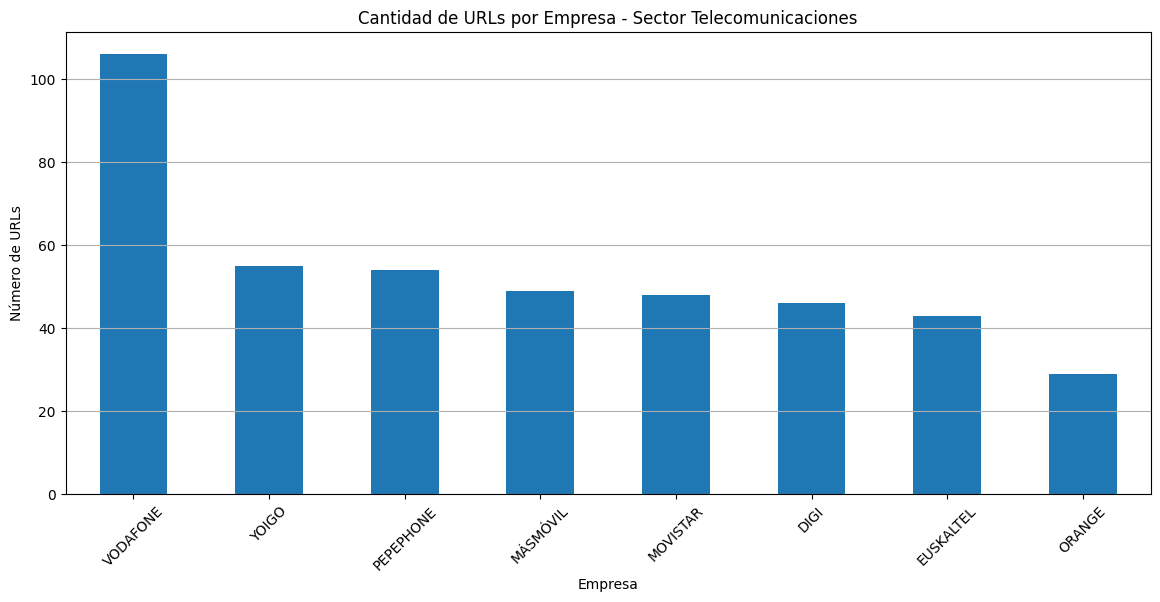

In [6]:
df_teleco_limpio['empresa'] = df_teleco_limpio['empresa'].str.upper().str.strip()

distribucion = df_teleco_limpio['empresa'].value_counts()

print("Distribución por empresa:")
print(distribucion)

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
distribucion.plot(kind='bar')
plt.title('Cantidad de URLs por Empresa - Sector Telecomunicaciones')
plt.xlabel('Empresa')
plt.ylabel('Número de URLs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [8]:
import os

base_path_processed = '/Users/test/Desktop/phishing-detector/data/processed/legitimas'
os.makedirs(base_path_processed, exist_ok=True)

archivo_limpio = 'teleco_legitimas_limpio.csv'
ruta_guardado = os.path.join(base_path_processed, archivo_limpio)

columnas_relevantes = ['empresa', 'url']

df_modelo = df_teleco_limpio[columnas_relevantes].drop_duplicates()

print(f"Filas tras eliminar duplicados en columnas relevantes: {len(df_modelo)}")

df_modelo.to_csv(ruta_guardado, index=False)

print(f"Dataset limpio guardado en: {ruta_guardado}")


Filas tras eliminar duplicados en columnas relevantes: 430
Dataset limpio guardado en: /Users/test/Desktop/phishing-detector/data/processed/legitimas/teleco_legitimas_limpio.csv
